In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Connect to (or create) the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sales data
sample_data = [
    ('Laptop', 5, 60000),
    ('Laptop', 3, 62000),
    ('Mouse', 15, 800),
    ('Mouse', 10, 750),
    ('Keyboard', 8, 1500),
    ('Keyboard', 5, 1600),
    ('Monitor', 4, 12000),
    ('Monitor', 6, 11000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [10]:
# total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

# Load results 
df = pd.read_sql_query(query, conn)


In [5]:
print("Basic Sales Summary:")
print(df)


Basic Sales Summary:
    product  total_quantity  total_revenue
0  Keyboard              26        40000.0
1    Laptop              16       972000.0
2   Monitor              20       228000.0
3     Mouse              50        39000.0


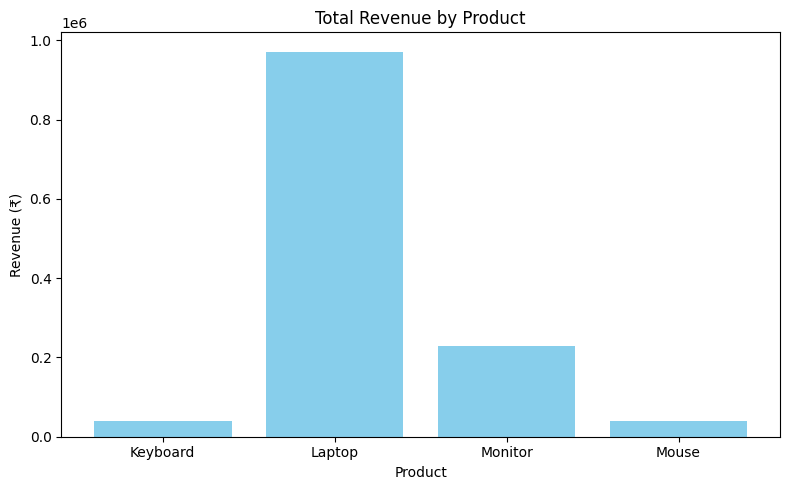

In [6]:
plt.figure(figsize=(8,5))
plt.bar(df['product'], df['total_revenue'], color='skyblue')
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()


In [7]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>

In [8]:
conn.close()
